In [162]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Нажмите сюда, чтобы показать/скрыть код."></form>''')

## Преподготовка данных.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

pd.options.display.float_format = '{:,.2f}'.format

plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 14

tfont = {'family': 'monospace',
         'color':  'black',
         'weight': 'normal',
         'size': 20}

lfont = {'family': 'monospace',
         'color':  'black',
         'weight': 'normal',
         'size': 16}

In [3]:
cd ./Documents

/Users/pavelkiselev/Documents


In [146]:
df = pd.read_excel("Тестовое.ods", engine="odf")
df

,Calculation1,Компания,Категория,Регион,Тип сделки,Категория недвижимости,Рубрика,Неделя,Контент
0,1,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-01 до 2018-01-07,69
1,2,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-08 до 2018-01-14,63
2,3,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-15 до 2018-01-21,81
3,4,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-22 до 2018-01-28,86
4,5,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-29 до 2018-02-04,86
...,...,...,...,...,...,...,...,...,...
104407,104 408,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,С 2019-10-21 до 2019-10-27,283
104408,104 409,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,С 2019-10-28 до 2019-11-03,282
104409,104 410,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,С 2019-11-04 до 2019-11-10,279
104410,104 411,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,С 2019-11-11 до 2019-11-17,284


In [147]:
segments = pd.read_excel("Сегменты.ods", engine="odf")
segments

,Категрия,Сегмент
0,Большое агенство (201-1000),АН
1,Крупное агенство (1000+),АН
2,Крупный маклер (4-9),SMB
3,Малое агенство (10-50),SMB
4,Собственник (1),Owner
5,Среднее агенство (51-200),АН
6,Частный маклер (2-3),SMB


In [148]:
df['Начало'] = df['Неделя'].apply(lambda x: pd.Timestamp(x[2:12]))
df['Конец'] = df['Неделя'].apply(lambda x: pd.Timestamp(x[-10:]))
df['Неделя'] = df.apply(lambda x: pd.Interval(x['Начало'], x['Конец'], closed='both'), axis=1)

df['Контент'] = df['Контент'].apply(lambda x: float(x))

df['Месяц'] = df['Начало'].apply(lambda x: x.month)

df = df.merge(segments, left_on='Категория', right_on='Категрия', how='left')
df

,Calculation1,Компания,Категория,Регион,Тип сделки,Категория недвижимости,Рубрика,Неделя,Контент,Начало,Конец,Месяц,Категрия,Сегмент
0,1,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,"[2018-01-01, 2018-01-07]",69.00,2018-01-01,2018-01-07,1,Большое агенство (201-1000),АН
1,2,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,"[2018-01-08, 2018-01-14]",63.00,2018-01-08,2018-01-14,1,Большое агенство (201-1000),АН
2,3,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,"[2018-01-15, 2018-01-21]",81.00,2018-01-15,2018-01-21,1,Большое агенство (201-1000),АН
3,4,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,"[2018-01-22, 2018-01-28]",86.00,2018-01-22,2018-01-28,1,Большое агенство (201-1000),АН
4,5,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,"[2018-01-29, 2018-02-04]",86.00,2018-01-29,2018-02-04,1,Большое агенство (201-1000),АН
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104407,104 408,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,"[2019-10-21, 2019-10-27]",283.00,2019-10-21,2019-10-27,10,Частный маклер (2-3),SMB
104408,104 409,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,"[2019-10-28, 2019-11-03]",282.00,2019-10-28,2019-11-03,10,Частный маклер (2-3),SMB
104409,104 410,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,"[2019-11-04, 2019-11-10]",279.00,2019-11-04,2019-11-10,11,Частный маклер (2-3),SMB
104410,104 411,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,"[2019-11-11, 2019-11-17]",284.00,2019-11-11,2019-11-17,11,Частный маклер (2-3),SMB


## Количество сделок в разбивке по регионам

Сгруппируем данные по компаниям и регионам.

## Количество сделок в разбивке по регионам.

<font size="3"> Сгруппируем данные по Игрокам и регионам. Посчитаем сумму сделок и доли каждого региона в общем количестве сделок. </font>

In [153]:
foo = pd.DataFrame.from_records(df.groupby(['Компания', 'Регион']).sum().to_records())
foo['Доля'] = foo['Контент'] / foo.groupby('Компания').sum()['Контент']['Игрок 1']
foo.loc[foo['Компания'] == 'Игрок 2', 'Доля'] = foo.loc[foo['Компания'] == 'Игрок 2', 'Контент'] \
                                              / foo.groupby('Компания').sum()['Контент']['Игрок 2']
foo = foo.drop('Месяц', axis=1)
foo

,Компания,Регион,Контент,Доля
0,Игрок 1,Воронеж,"2,925,955.00",0.06
1,Игрок 1,Екатеринбург,"2,502,645.00",0.05
2,Игрок 1,Казань,"2,263,792.00",0.04
3,Игрок 1,Краснодар,"4,455,822.00",0.09
4,Игрок 1,Москва,"6,184,720.00",0.12
5,Игрок 1,Нижний Новгород,"2,995,311.00",0.06
6,Игрок 1,Новосибирск,"3,778,605.00",0.07
7,Игрок 1,Ростов-на-Дону,"1,759,930.00",0.03
8,Игрок 1,Самара,"2,213,956.00",0.04
9,Игрок 1,Санкт-Петербург,"6,557,718.00",0.13


<font size="3"> Далее визуализируем данные. Как видно из графиков ниже, у Игрока 2 больше присутствие в городах-мегаполисах. Если выразить это в долях, то 0.36 всех сделок Игрока 2 принадлежат Санкт-Петербургу и Москве. Особенно явно это видно на примере Санкт-Петербурга, где количество сделок Игрока 2 в два раза больше, чем у Игрока 1. </font>

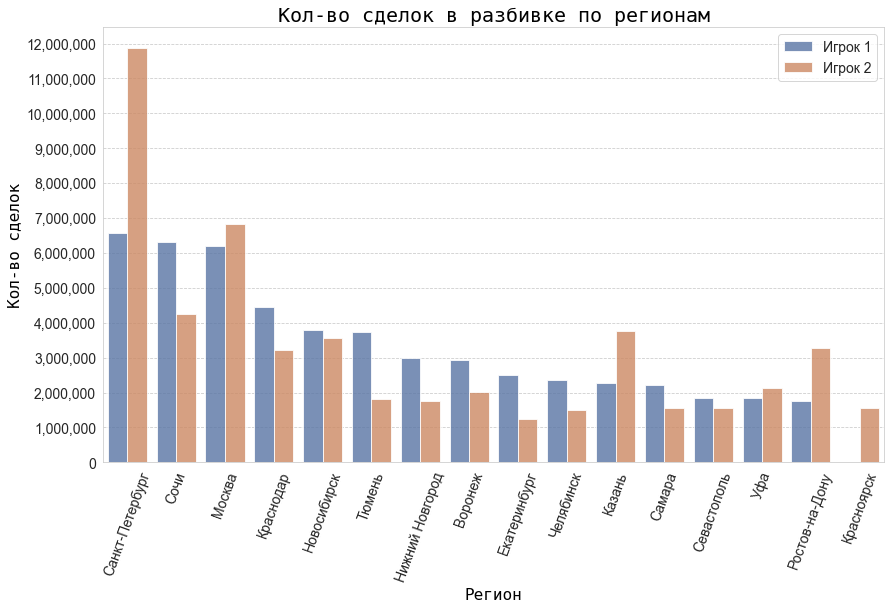

In [161]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(ax=ax, x='Регион', y='Контент', hue='Компания',
            data=foo.sort_values(by=['Компания', 'Контент'], ascending=[True, False]), alpha=.8, palette='deep')

ax.set_title('Кол-во сделок в разбивке по регионам', fontdict=tfont)
ax.set_xlabel('Регион', fontdict=lfont)
ax.set_ylabel('Кол-во сделок', fontdict=lfont)

ax.tick_params(axis='x', labelrotation=70) 

ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1_000_000))

ax.legend(loc='upper right');

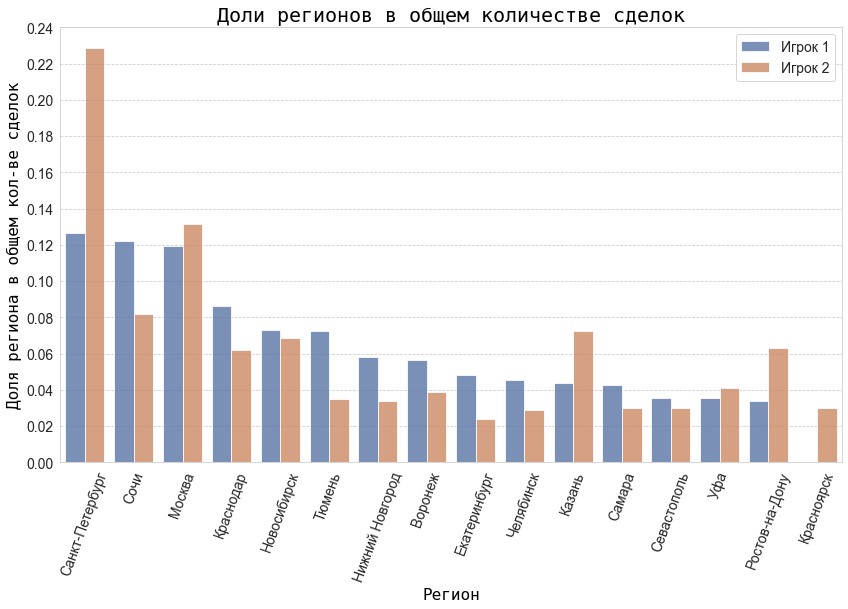

In [164]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(ax=ax, x='Регион', y='Доля', hue='Компания',
            data=foo.sort_values(by=['Компания', 'Контент'], ascending=[True, False]), alpha=.8, palette='deep')

ax.set_title('Доли регионов в общем количестве сделок', fontdict=tfont)
ax.set_xlabel('Регион', fontdict=lfont)
ax.set_ylabel('Доля региона в общем кол-ве сделок', fontdict=lfont)

ax.tick_params(axis='x', labelrotation=70) 

ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.02))

ax.legend(loc='upper right');

## Количествово сделок в разбивке по 1) типу сделки, 2) категории недвижимости и 3) сегменту

<font size="3">Теперь сгруппируем данные по 1) типу сделки, 2) категории недвижимости и 3) сегменту.</font>

In [15]:
bar = pd.DataFrame.from_records(df.groupby(['Компания', 'Тип сделки']).sum().to_records())
bar

,Компания,Тип сделки,Контент
0,Игрок 1,Аренда,"13,571,578.00"
1,Игрок 1,Продажа,"38,148,562.00"
2,Игрок 2,Аренда,"9,849,802.00"
3,Игрок 2,Продажа,"42,065,744.00"


In [34]:
puk = pd.DataFrame.from_records(df.groupby(['Компания', 'Категория недвижимости']).sum().to_records())
puk

,Компания,Категория недвижимости,Контент
0,Игрок 1,Городская,"37,555,979.00"
1,Игрок 1,Загородная,"14,164,161.00"
2,Игрок 2,Городская,"44,310,770.00"
3,Игрок 2,Загородная,"7,604,776.00"


In [36]:
seg = pd.DataFrame.from_records(df.groupby(['Компания', 'Сегмент']).sum().to_records())
seg

,Компания,Сегмент,Контент
0,Игрок 1,Owner,"20,132,222.00"
1,Игрок 1,SMB,"15,368,427.00"
2,Игрок 1,АН,"16,219,491.00"
3,Игрок 2,Owner,"7,878,757.00"
4,Игрок 2,SMB,"12,910,441.00"
5,Игрок 2,АН,"31,126,348.00"


<font size="3"> Как видно из диаграммы, бóльшее присутствие Игрока 2 на рынке городов-мегаполисов выражается в бóльшем количестве сделок по городской недвижимости и в бóльшем количестве сделок в сегменте АН (агенств, от средних до больших). </font>

Из диаграмм видно, что присутсвие Игрока 2 на рынке недвижимости в городах-мегаполисах выражается в бóльшем количестве сделок по городской недвижимости и бóльшем количестве сделок, заключенных с участием агенств (сегмент АН).

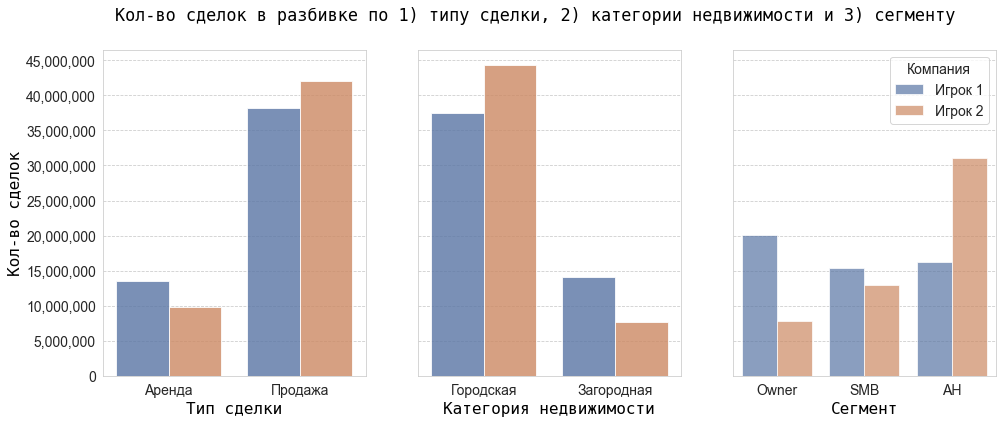

In [155]:
fig, ax = plt.subplots(1, 3, figsize=(16,6), sharey=True)

sns.barplot(ax=ax[0], x='Тип сделки', y='Контент', hue='Компания', data=bar, alpha=.8, palette='deep')

#ax[0].ticklabel_format(style='plain', axis='y')
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(5_000_000))
ax[0].get_legend().remove()
ax[0].set_xlabel('Тип сделки', fontdict=lfont)
ax[0].set_ylabel('Кол-во сделок', fontdict=lfont)

sns.barplot(ax=ax[1], x='Категория недвижимости', y='Контент', hue='Компания', data=puk, alpha=.8, palette='deep')

#ax[1].ticklabel_format(style='plain', axis='y')
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[1].get_legend().remove()
ax[1].set_xlabel('Категория недвижимости', fontdict=lfont)


sns.barplot(ax=ax[2], x='Сегмент', y='Контент', hue='Компания', data=seg, alpha=.7, palette='deep')

#ax[2].ticklabel_format(style='plain', axis='y')
ax[2].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[2].set_xlabel('Сегмент', fontdict=lfont)

for ax in fig.get_axes():
    ax.label_outer()
    
fig.suptitle('Кол-во сделок в разбивке по 1) типу сделки, 2) категории недвижимости и 3) сегменту', fontdict=tfont);

## Количество сделок в динамике

<font size="3"> Далее посмотрим на данные в динамике — для этого сгруппируем данные по началу периода наблюдения.</font>

In [58]:
time = pd.DataFrame.from_records(df.groupby(['Компания', 'Начало']).sum().to_records())
time

,Компания,Начало,Контент
0,Игрок 1,2018-01-01,"519,240.00"
1,Игрок 1,2018-01-08,"521,144.00"
2,Игрок 1,2018-01-15,"538,509.00"
3,Игрок 1,2018-01-22,"556,009.00"
4,Игрок 1,2018-01-29,"588,025.00"
...,...,...,...
191,Игрок 2,2019-10-21,"487,791.00"
192,Игрок 2,2019-10-28,"483,225.00"
193,Игрок 2,2019-11-04,"478,776.00"
194,Игрок 2,2019-11-11,"484,430.00"


<font size="3"> На графике присутствует периодичность в заключении сделок. Период равняется одному году. Таким образом, локальные максимумы достигаются Игроками в середине каждого года, а локальные минимумы в начале каждого года.

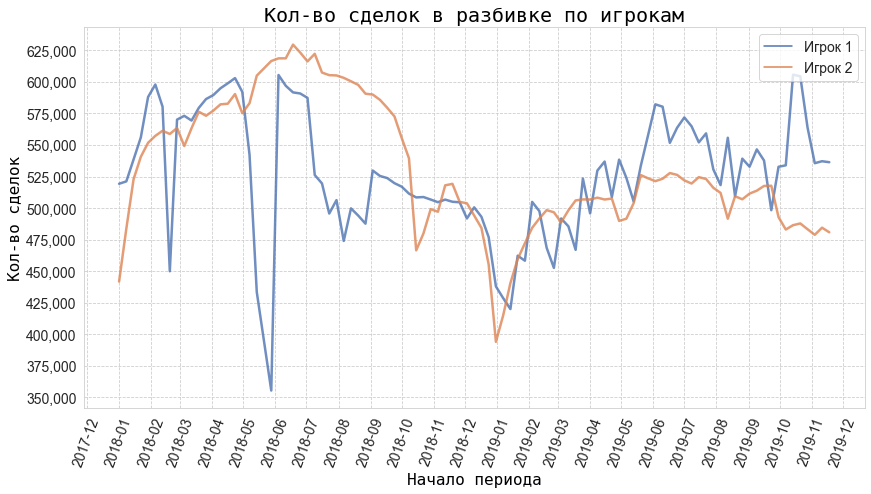

In [159]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(14,7))

sns.lineplot(ax=ax, x='Начало', y='Контент', hue='Компания', data=time, linewidth=2.5, alpha=.8, palette='deep')

ax.set_title('Кол-во сделок в разбивке по игрокам', fontdict=tfont)
ax.set_xlabel('Начало периода', fontdict=lfont)
ax.set_ylabel('Кол-во сделок', fontdict=lfont)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', labelrotation=70) 

ax.yaxis.set_major_locator(ticker.MultipleLocator(25_000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(loc='upper right');

<font size="3"> Более детально рассмотрим динамику по сегментам каждого Игрока.

In [99]:
time_cat = pd.DataFrame.from_records(df.groupby(['Компания', 'Начало', 'Сегмент']).sum().to_records())
time_cat

,Компания,Начало,Сегмент,Контент
0,Игрок 1,2018-01-01,Owner,"184,650.00"
1,Игрок 1,2018-01-01,SMB,"162,548.00"
2,Игрок 1,2018-01-01,АН,"172,042.00"
3,Игрок 1,2018-01-08,Owner,"187,589.00"
4,Игрок 1,2018-01-08,SMB,"165,033.00"
...,...,...,...,...
583,Игрок 2,2019-11-11,SMB,"138,840.00"
584,Игрок 2,2019-11-11,АН,"268,511.00"
585,Игрок 2,2019-11-18,Owner,"77,422.00"
586,Игрок 2,2019-11-18,SMB,"145,407.00"


<font size="3"> Наблюдения следующие: 

1. Игроку 1  присуща бóльшая волатильность как в разрезе каждого сегмента, так и в общем. 
2. Игрок 1 за два года сильно усилил свое присутствие на рынке в категории Owner (собственников); а у Игрока 2 по-прежнему наибольшее присутсвие в категории АН (агенств), хотя он его плавно терял, при этом не приобретая больше сделок в других сегментах. 
3. На 2018-01 у Игрока 2 было 1,793,687 сделок в сегменте АН. На 2019-10 и 2019-11 соотвественно 1,086,798 и 792,274 сделок в сегменте АН. Подробная детализация приведена в таблицах в конце страницы. </font>

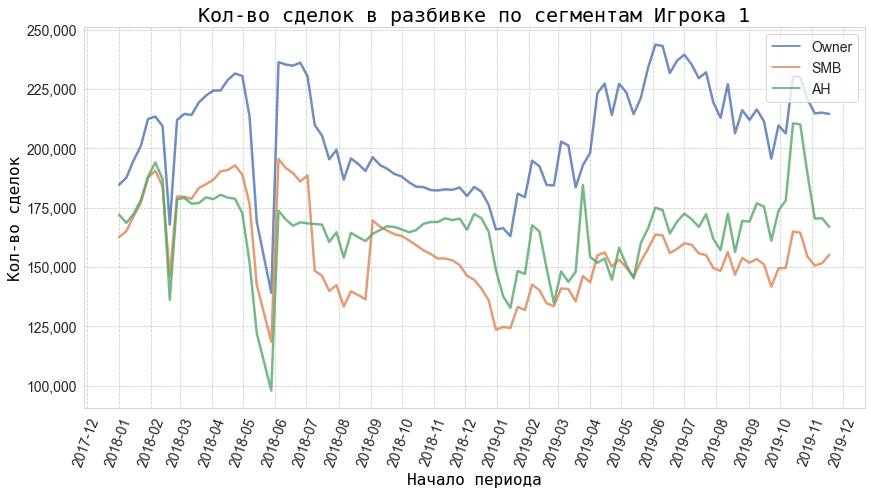

In [158]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(14,7))

sns.lineplot(ax=ax, x='Начало', y='Контент', hue='Сегмент', data=time_cat.query("Компания == 'Игрок 1'"), 
             linewidth=2.5, alpha=.8, palette='deep')

ax.set_title('Кол-во сделок в разбивке по сегментам Игрока 1', fontdict=tfont)
ax.set_xlabel('Начало периода', fontdict=lfont)
ax.set_ylabel('Кол-во сделок', fontdict=lfont)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', labelrotation=70) 

ax.yaxis.set_major_locator(ticker.MultipleLocator(25_000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(loc='upper right');

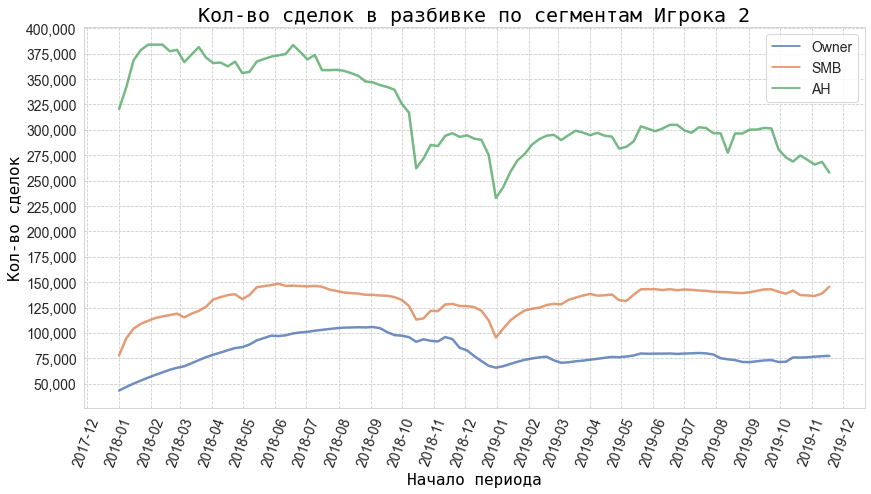

In [157]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(14,7))

sns.lineplot(ax=ax, x='Начало', y='Контент', hue='Сегмент', data=time_cat.query("Компания == 'Игрок 2'"), 
             linewidth=2.5, alpha=.8, palette='deep')

ax.set_title('Кол-во сделок в разбивке по сегментам Игрока 2', fontdict=tfont)
ax.set_xlabel('Начало периода', fontdict=lfont)
ax.set_ylabel('Кол-во сделок', fontdict=lfont)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', labelrotation=70) 

ax.yaxis.set_major_locator(ticker.MultipleLocator(25_000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.legend(loc='upper right');

<font size="3">Ниже приведено количество сделок Игрока-2 за 2018 год в разрезе сегментов и месяцев. </font>

In [142]:
df.query("Начало < '2019-01-01' and Компания == 'Игрок 2'").groupby(['Сегмент', 'Месяц']).sum()

Контент
Сегмент Месяц             
Owner   1       249,090.00
        2       249,147.00
        3       286,636.00
        4       413,213.00
        5       278,496.00
        6       394,489.00
        7       514,612.00
        8       421,578.00
        9       409,114.00
        10      470,287.00
        11      366,711.00
        12      365,736.00
SMB     1       497,783.00
        2       467,484.00
        3       481,757.00
        4       676,842.00
        5       429,510.00
        6       587,364.00
        7       721,783.00
        8       555,361.00
        9       546,158.00
        10      608,323.00
        11      504,536.00
        12      581,298.00
АН      1     1,793,687.00
        2     1,524,007.00
        3     1,493,568.00
        4     1,817,645.00
        5     1,096,609.00
        6     1,508,273.00
        7     1,819,964.00
        8     1,415,025.00
        9     1,372,620.00
        10    1,461,836.00
        11    1,167,868.00
        12    1,384,287.00

<font size="3"> Ниже приведено количество сделок Игрока-2 за 2019 год в разрезе сегментов и месяцев. </font>

In [144]:
df.query("Начало >= '2019-01-01' and Компания == 'Игрок 2'").groupby(['Сегмент', 'Месяц']).sum()

Контент
Сегмент Месяц             
Owner   1       281,834.00
        2       300,362.00
        3       286,424.00
        4       376,029.00
        5       313,676.00
        6       318,181.00
        7       398,320.00
        8       293,741.00
        9       360,814.00
        10      299,169.00
        11      231,098.00
SMB     1       456,474.00
        2       504,780.00
        3       532,207.00
        4       682,213.00
        5       555,109.00
        6       570,469.00
        7       708,968.00
        8       559,144.00
        9       707,830.00
        10      554,431.00
        11      420,617.00
АН      1     1,048,681.00
        2     1,165,917.00
        3     1,181,077.00
        4     1,460,829.00
        5     1,176,263.00
        6     1,209,927.00
        7     1,497,673.00
        8     1,166,952.00
        9     1,484,568.00
        10    1,086,798.00
        11      792,274.00